In [1]:
from VegaZero2VegaLite import VegaZero2VegaLite
from vega import VegaLite
import pandas as pd

In [2]:
vz2vl = VegaZero2VegaLite()

<strong> <big> Convert a Vege-Zero to a Vega-Lite with specifying the dataframe data </big> </strong>

In [3]:
df = pd.read_csv('./Examples/payments.csv')

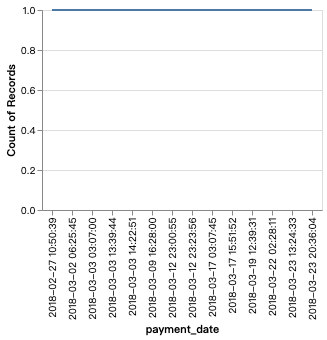

In [4]:
VegaLite(
    vz2vl.to_VegaLite(
        "mark line data payments encoding x payment_date y aggregate count payment_date transform filter amount_paid > 300 or payment_type_code = 'check'",
        df
    )
)

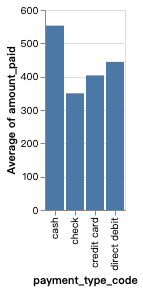

In [5]:
VegaLite(
    vz2vl.to_VegaLite(
        "mark bar data payments encoding x payment_type_code y aggregate average amount_paid group x",
        df
    )
)

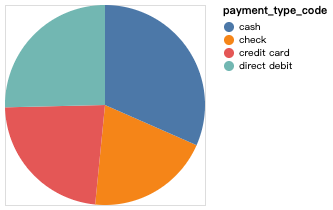

In [11]:
VegaLite(vz2vl.to_VegaLite(
    "mark arc data payments encoding x payment_type_code y aggregate average amount_paid group x",
    df
))

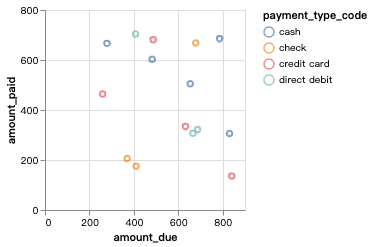

In [12]:
VegaLite(vz2vl.to_VegaLite(
    "mark point data payments encoding x amount_due y aggregate none amount_paid color payment_type_code",
    df
))

In [13]:
df = pd.read_csv('./Examples/US_States.csv')
df

date         states      cases  number
0      2020-01-21     washington  confirmed       1
1      2020-01-21     washington     deaths       0
2      2020-01-22     washington  confirmed       1
3      2020-01-22     washington     deaths       0
4      2020-01-23     washington  confirmed       1
...           ...            ...        ...     ...
49303  2021-05-24  west virginia     deaths    2775
49304  2021-05-24      wisconsin  confirmed  672801
49305  2021-05-24      wisconsin     deaths    7749
49306  2021-05-24        wyoming  confirmed   59797
49307  2021-05-24        wyoming     deaths     713

[49308 rows x 4 columns]

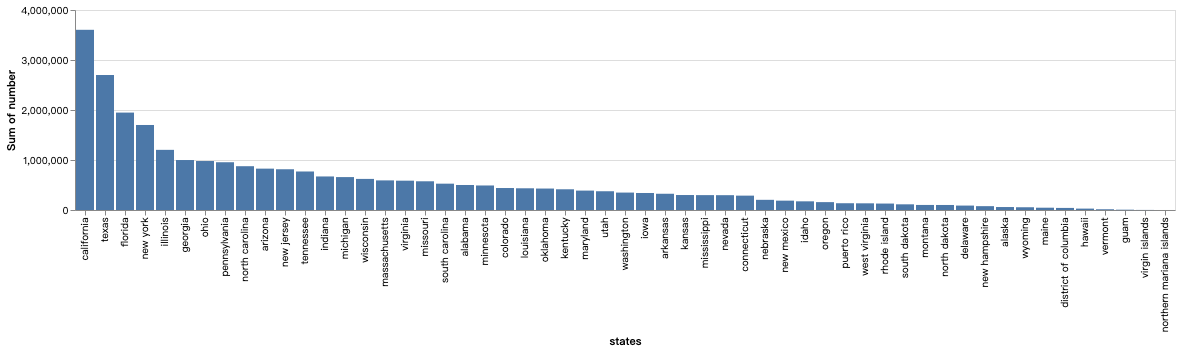

In [14]:
VegaLite(
    vz2vl.to_VegaLite(
        "mark bar data US_States.csv encoding x states y aggregate sum number transform filter date = '2021-03-08' and cases = 'confirmed' group x sort y desc",
        df
    )
)
         

In [15]:
import json
json.dumps(vz2vl.to_VegaLite(
        "mark bar data US_States.csv encoding x states y aggregate sum number transform filter date = '2021-03-08' and cases = 'confirmed' group x sort y desc"
    ))

'{"mark": "bar", "encoding": {"x": {"field": "states", "type": "nominal", "sort": "-y"}, "y": {"field": "number", "type": "quantitative", "aggregate": "sum"}}, "transform": [{"filter": "datum.date == \'2021-03-08\' & datum.cases == \'confirmed\'"}]}'

<big> <strong> Convert a Vege-Zero to a Vega-Lite with specifying the dataframe data </strong> </big>

In [3]:
vega_lite = vz2vl.to_VegaLite(
    "mark line data payments encoding x payment_date y aggregate count payment_date transform filter amount_paid > 300 or payment_type_code = 'check'"
)

In [4]:
vega_lite
# now, you can preview the Vega-Lite specification, without the 'data' part

{'mark': 'line',
 'encoding': {'x': {'field': 'payment_date', 'type': 'nominal'},
  'y': {'field': 'payment_date',
   'type': 'quantitative',
   'aggregate': 'count'}},
 'transform': [{'filter': "datum.amount_paid > 300 | datum.payment_type_code == 'check'"}]}

In [5]:
df = pd.read_csv('./Examples/payments.csv')

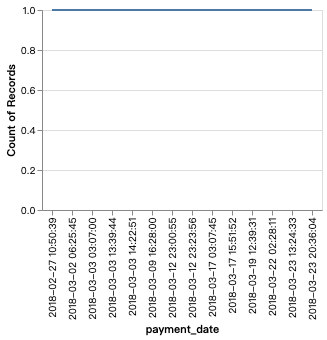

In [6]:
# next, you can render the Vega-Lite, by specifying the 'data' part
VegaLite(vega_lite, df)

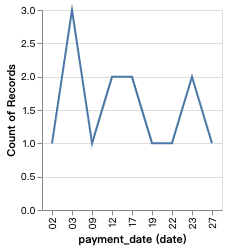

In [7]:
# alternatively, you can further modify the Vega-Lite to improve the visualization quality.
vega_lite['encoding']['x']['timeUnit'] = 'date'

VegaLite(vega_lite, df)